In [51]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import matplotlib.pyplot as plt
import numpy as np
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.regression
from scipy import stats
%matplotlib inline

In [219]:
df = pd.read_excel('C:/Users/stefa/Desktop/Apple.xlsx')
#df.set_index('Date', inplace=True)
df

,Date,Close
0,2005-01-03,1.130179
1,2005-01-04,1.141786
2,2005-01-05,1.151786
3,2005-01-06,1.152679
4,2005-01-07,1.236607
...,...,...
4130,2021-06-02,125.059998
4131,2021-06-03,123.540001
4132,2021-06-04,125.889999
4133,2021-06-07,125.900002


In [228]:
ret_all = 100*np.log(df['Close'].pct_change()+1).dropna()
ret_all
ret_all_df = pd.DataFrame(ret_all)
ret_all_df
#print(type(ret_all))
ret_all_df.reset_index() 
df_ret_merge = df.merge(right= ret_all_df,  left_index=True, right_index=True)
df_ret_merge
df_ret_merge.rename(columns={'Close_y':'Ret'}, inplace = True)
df_ret_merge.drop(['Close_x'], axis=1, inplace=True)
df_ret_merge.set_index('Date', inplace=True)
df_ret_merge
#df_ret.drop(['Close_x'], axis=1, inplace=True)
#ret1.reset_index() 
#df_ret_all = df.merge(right= ret_all,  left_index=True, right_index=True)
#df_ret
#df_ret.rename(columns={'Close_y':'Ret'}, inplace = True)
#df_ret.drop(['Close_x'], axis=1, inplace=True)
#f_ret.set_index('Date', inplace=True)


,Ret
Date,
2005-01-04,1.021768
2005-01-05,0.872008
2005-01-06,0.077502
2005-01-07,7.028254
2005-01-10,-0.419606
...,...
2021-06-02,0.625653
2021-06-03,-1.222861
2021-06-04,1.884350


Text(0.5, 1.0, 'Evolution of stock prices for Apple')

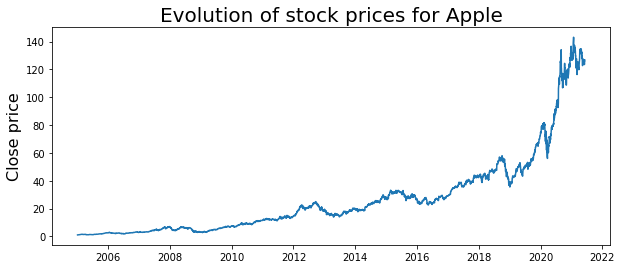

In [7]:
plt.figure(figsize= (10,4))
plt.plot(df)
plt.ylabel('Close price', fontsize= 16)
plt.title('Evolution of stock prices for Apple', fontsize=20)

# Conventional Volatility Measure-Standard Deviation

In [95]:
training = pd.read_excel('C:/Users/stefa/Desktop/Training.xlsx')
training
ret = 100*np.log(training['Close'].pct_change()+1).dropna()
print(ret)
std_annual=np.std(ret)*np.sqrt(252)
print('volatility (std)=',round(std_annual,4))

1       1.021768
2       0.872008
3       0.077502
4       7.028254
5      -0.419606
          ...   
4022   -0.700047
4023    0.768265
4024    3.514097
4025   -1.340429
4026   -0.856325
Name: Close, Length: 4026, dtype: float64
volatility (std)= 33.4142


# Testul Shapiro de normalitate 

In [96]:
#print('ticker=',ticker,'W-test, and P-value')
print(stats.shapiro(ret))

ShapiroResult(statistic=0.9398436546325684, pvalue=1.2200757085818258e-37)


# Estimarea fat tails

In [97]:
print('mean =',np.mean(ret))
print('std =',np.std(ret))
print('skewness=',stats.skew(ret))
print('kurtosis=',stats.kurtosis(ret)) #excess kurtosis

mean = 0.11856363740117713
std = 2.1048996315708566
skewness= -0.291058460131336
kurtosis= 6.00763541412347


# Test of heteroskedasticity, Breusch, and Pagan

# Volatility clustering

Text(0.5, 1.0, 'Illustration of volatility clustering')

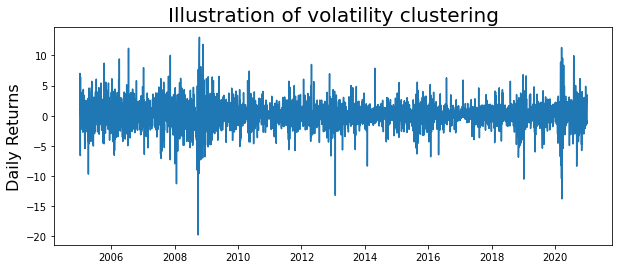

In [104]:
#df3 = pd.merge(training, ret1)
#df3

#ret
#ret1 = pd.DataFrame(ret)
#ret1
#ret1.rename(columns={'Close':'Ret'}, inplace = True)
#ret1
ret1.reset_index() 
df_ret = training.merge(right= ret1,  left_index=True, right_index=True)
df_ret
df_ret.rename(columns={'Close_y':'Ret'}, inplace = True)
df_ret.drop(['Close_x'], axis=1, inplace=True)
df_ret.set_index('Date', inplace=True)

plt.figure(figsize= (10,4))
plt.plot(df_ret)
plt.ylabel('Daily Returns', fontsize= 16)
plt.title('Illustration of volatility clustering', fontsize=20)


#ret1.columns
#ret1.drop(['index'], axis=1, inplace=True)
#df.set_index('Date', inplace=True)
#training

#plt.plot(df_ret)
#plt.title('Illustration of volatility clustering')
#plt.ylabel('Daily returns')
#plt.xlabel('Date')
#plt.show()

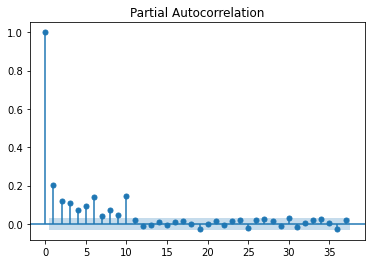

In [105]:
plot_pacf(df_ret['Ret']**2)
plt.show()

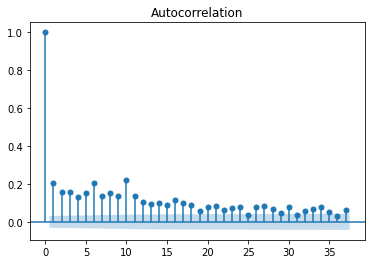

In [164]:
plot_acf(df_ret['Ret']**2)
plt.show()

# Standardized Residuals and Annualized Conditional Volatility

In [177]:
am = arch_model(df_ret)
res = am.fit(update_freq=5)
print(res.summary())

Iteration:      5,   Func. Count:     39,   Neg. LLF: 8245.744168029578
Optimization terminated successfully    (Exit mode 0)
            Current function value: 8245.743303592568
            Iterations: 8
            Function evaluations: 53
            Gradient evaluations: 8
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                    Ret   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -8245.74
Distribution:                  Normal   AIC:                           16499.5
Method:            Maximum Likelihood   BIC:                           16524.7
                                        No. Observations:                 4026
Date:                Sat, Jun 12 2021   Df Residuals:                     4025
Time:                        19:40:19   Df Model:                            1
          

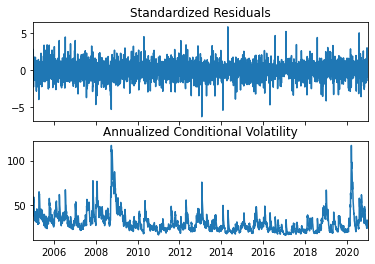

In [178]:
fig = res.plot(annualize='D')

# MODEL GARCH(1,1)

In [179]:
model = arch_model(df_ret, p=1, q=1)
res = model.fit(update_freq=5, disp='off')
print(res.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                    Ret   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -8245.74
Distribution:                  Normal   AIC:                           16499.5
Method:            Maximum Likelihood   BIC:                           16524.7
                                        No. Observations:                 4026
Date:                Sat, Jun 12 2021   Df Residuals:                     4025
Time:                        19:40:30   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.1953  2.872e-02      6.800  1.044e-11 [  0.139,  0.25

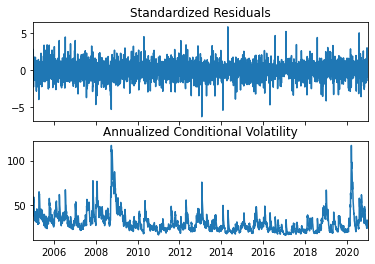

In [180]:
fig = res.plot(annualize='D')

In [232]:
model = arch_model(df_ret, p=3, q=0)

In [233]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 22149.898876521187
Iteration:      2,   Func. Count:     16,   Neg. LLF: 14587.354982439963
Iteration:      3,   Func. Count:     25,   Neg. LLF: 47418.672169919795
Iteration:      4,   Func. Count:     32,   Neg. LLF: 21670.050829144544
Iteration:      5,   Func. Count:     39,   Neg. LLF: 2812075586.3211565
Iteration:      6,   Func. Count:     46,   Neg. LLF: 30971.28144638214
Iteration:      7,   Func. Count:     53,   Neg. LLF: 10576.165775069949
Iteration:      8,   Func. Count:     60,   Neg. LLF: 8476.097458880593
Iteration:      9,   Func. Count:     67,   Neg. LLF: 8404.819583663637
Iteration:     10,   Func. Count:     73,   Neg. LLF: 8404.63838372551
Iteration:     11,   Func. Count:     79,   Neg. LLF: 8404.621543838506
Iteration:     12,   Func. Count:     85,   Neg. LLF: 8404.620914481759
Iteration:     13,   Func. Count:     91,   Neg. LLF: 8404.620867920823
Iteration:     14,   Func. Count:     97,   Neg. LLF: 8404.

In [234]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                    Ret   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -8404.62
Distribution:                  Normal   AIC:                           16819.2
Method:            Maximum Likelihood   BIC:                           16850.7
                                        No. Observations:                 4026
Date:                Sun, Jun 13 2021   Df Residuals:                     4025
Time:                        17:30:30   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.1796  3.132e-02      5.733  9.881e-09 [  0.118,  0.241]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          2.1207      0.178     11.903  1.147e-32   [  1.772,  2.470]
alpha[1]       0.2396  5.715e-02      4.193  2.753e-05   [  0.128,  0.352]
alpha[2]       0.1696  3.396e-02      4.995  5.884e-07   [  0.103,  0.236]
alpha[3]       0.1592  3.160e-02      5.038  4.695e-07 [9.729e-02,  0.221]
==========================================================================

Covariance estimator: robust
"""

# Forecasting

In [186]:
test = pd.read_excel('C:/Users/stefa/Desktop/Test.xlsx')
test
ret_test = 100*np.log(test['Close'].pct_change()+1).dropna()
ret_test

,Date,Close
0,2021-01-04,129.410004
1,2021-01-05,131.009995
2,2021-01-06,126.599998
3,2021-01-07,130.919998
4,2021-01-08,132.050003
...,...,...
103,2021-06-02,125.059998
104,2021-06-03,123.540001
105,2021-06-04,125.889999
106,2021-06-07,125.900002


Text(0.5, 1.0, 'Illustration of volatility clustering')

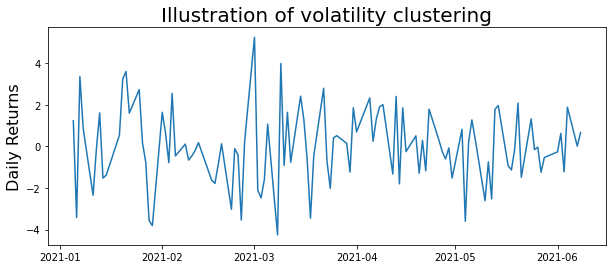

In [202]:

ret_test.reset_index() 
df_ret_test = test.merge(right= ret_test,  left_index=True, right_index=True)
df_ret_test
df_ret_test.rename(columns={'Close_y':'Ret'}, inplace = True)
df_ret_test.drop(['Close_x'], axis=1, inplace=True)
df_ret_test.set_index('Date', inplace=True)
df_ret_test

plt.figure(figsize= (10,4))
plt.plot(df_ret_test)
plt.ylabel('Daily Returns', fontsize= 16)
plt.title('Illustration of volatility clustering', fontsize=20)



In [211]:
from arch.__future__ import reindexing

rolling_predictions = []
test_size = 107

for i in range(test_size):
    train = ret_all[:-(test_size-i)]
    model = arch_model(train, p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [212]:
rolling_predictions = pd.Series(rolling_predictions, index=df_ret.index[-107:])

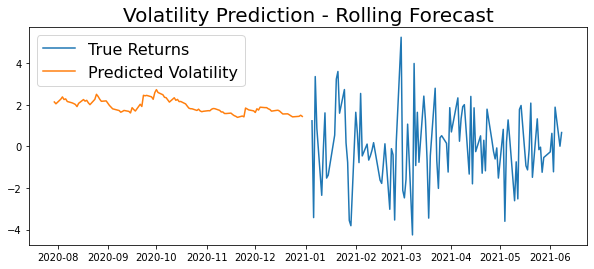

In [213]:
plt.figure(figsize=(10,4))
true, = plt.plot(ret_all[-107:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)